# <center>Face Sticker</center>

오늘 배운 내용을 이용해서 여러분 만의 스티커를 만들고 적용해보겠습니다.

주요 라이브러리 버전을 확인해 보고 시작하죠!

In [137]:
import cv2
import dlib
import matplotlib.pyplot as plt
import os
import numpy as np

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


## Step 1. 스티커 구하기 or 만들기
스티커를 만들거나 구해야합니다. PPT, 포토샵 등을 이용해서 직접 만드셔도 좋습니다. 보다 간단한 방법은 픽토그램 아이콘을 이용하면 쉽게 만들 수 있습니다.

마침 flaticon 사이트에 고양이 수염 이미지가 공개되어 있습니다.

 - [고양이 수염 이미지](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)

(1) 고양이 수염 이미지를 다운로드 받아주세요.

(2) 여러분의 셀카 이미지도 촬영해 주세요.

## Step 2. 얼굴 검출 & 랜드마크 검출 하기
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

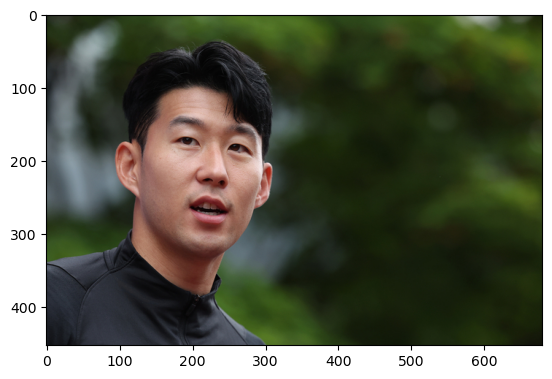

In [138]:
my_image_path = '/Users/louan/Documents/projects/Aiffel/lms/projects/data/proj_7/son.jpeg' # 이미지 경로
img_bgr = cv2.imread(my_image_path)    

img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show_rgb_pure = img_rgb.copy() # 수염을 적용할 이미지 따로 저장

plt.imshow(img_rgb) 
plt.show()
# plt.show() # 이미지를 출력해준다. (실제 출력)

rectangles[[(139, 118) (324, 304)]]


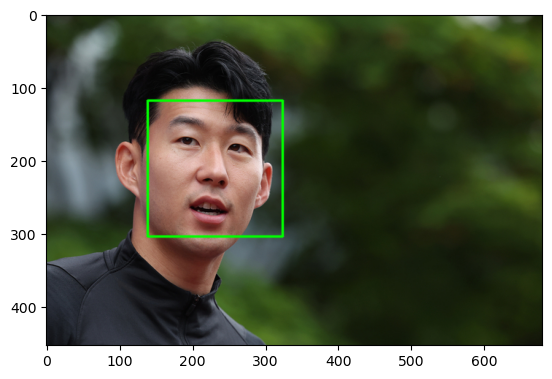

In [139]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [140]:
model_path = '/Users/louan/Documents/projects/Aiffel/lms/data/230103/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)

In [141]:
list_landmarks = [] # 랜드마크의 위치를 저장할 list    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장|

print(len(list_landmarks[0]))
print(list_landmarks[0])

68
[(130, 181), (129, 205), (128, 228), (131, 252), (139, 274), (153, 294), (172, 311), (194, 323), (218, 328), (239, 326), (257, 314), (271, 296), (280, 277), (286, 256), (290, 234), (293, 214), (294, 194), (166, 152), (179, 142), (194, 141), (210, 145), (225, 153), (244, 156), (257, 151), (271, 152), (283, 158), (287, 173), (234, 177), (235, 190), (236, 203), (237, 217), (214, 230), (223, 233), (231, 236), (238, 235), (244, 235), (182, 173), (191, 169), (201, 171), (208, 179), (199, 179), (190, 177), (250, 185), (258, 179), (268, 180), (274, 188), (267, 190), (257, 188), (198, 266), (209, 254), (221, 249), (228, 253), (235, 252), (243, 261), (248, 273), (241, 285), (232, 289), (224, 289), (216, 286), (205, 279), (203, 266), (220, 259), (227, 261), (233, 263), (242, 272), (233, 275), (226, 275), (218, 272)]


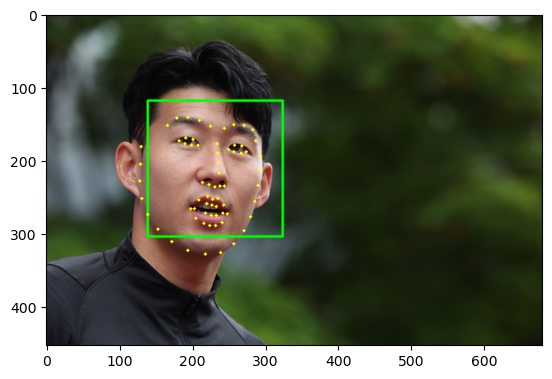

In [142]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB) # RGB 이미지로 전환
    
plt.imshow(img_show_rgb)
plt.show()
    # 이미지를 출력

## Step 3. 스티커 적용 위치 확인하기
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

content img
코 끝인 33 번보다 좋은 위치가 있을 거예요.

In [143]:
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30], landmark[33]) 
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = int((landmark[30][1] + landmark[33][1])/2) - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 + 얼굴 영역의 콧망울 세로를 차지하는 픽셀의 수//2 
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(237, 217) (231, 236)
(x,y) : (231,133)
(w,h) : (186,186)


In [144]:
print("w:", w, "h: ", h)
refined_x = x - int(w // 2) 
refined_y = y # 133-186 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남

w: 186 h:  186
(x,y) : (138,133)


## Step 4. 스티커 적용하기

(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

In [145]:
sticker_path = os.getenv('HOME')+'/Documents/projects/Aiffel/lms/projects/data/proj_7/cat-whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) #cv2.IMREAD_UNCHANGED) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h))

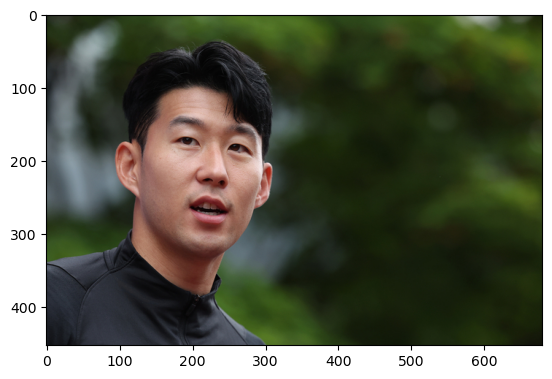

In [146]:
plt.imshow(img_show_rgb_pure)

(186, 186, 3) (186, 186, 3) (186, 186, 3)


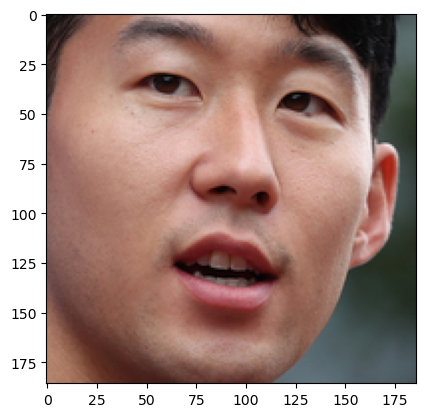

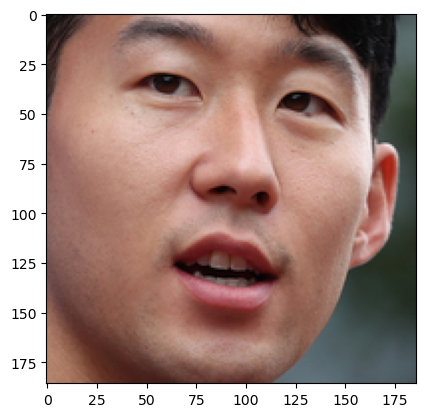

In [147]:

# 수염을 적용할 얼굴 부분만 따로 지정하여 확이함
sticker_area = img_show_rgb_pure[refined_x:refined_x+img_sticker.shape[0], refined_y:refined_y+img_sticker.shape[1]]
face_photo = img_show_rgb_pure[refined_x: refined_x + sticker_area.shape[0], refined_y: refined_y + sticker_area.shape[1]]
mask = face_photo.astype(bool)
print(face_photo.shape, sticker_area.shape, mask.shape)
plt.imshow(face_photo)
plt.show()
plt.imshow(sticker_area)
plt.show()


186
186


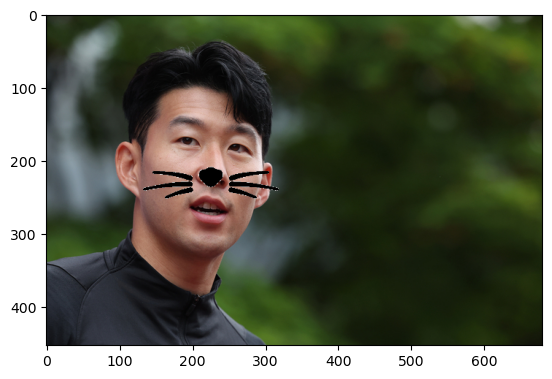

In [148]:
# image 합치기 cv2.addweighted() 참고: https://www.binarystudy.com/2022/09/How-to-add-subtract-different-size-images-using-OpenCV-Python.html
print(min(img_bgr.shape[0],img_sticker.shape[0]))
print(min(img_bgr.shape[1],img_sticker.shape[1]))

# img_show_rgb_pure[refined_x : refined_x + min(img_show_rgb_pure.shape[0],img_sticker.shape[0]), refined_y : refined_y + min(img_show_rgb_pure.shape[1],img_sticker.shape[1])] = \
#     np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

img_show_rgb_pure[refined_x : refined_x + min(img_show_rgb_pure.shape[0],img_sticker.shape[0]), refined_y : refined_y + min(img_show_rgb_pure.shape[1],img_sticker.shape[1])] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(img_show_rgb_pure)

## Step 5. 문제점 찾아보기
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
실행 속도가 중요할까요?
스티커앱을 만들 때 정확도가 얼마나 중요할까요?